# Proyecto

En este modulo vamos a hacer un proyecto entero de aprendizaje supervisado, pasando por todos los pasos del mismo, los cuales son:

* Definición del problema.
* Búsqueda de datos. 
* Análisis exploratorio y limpieza.
* Separación de entrenamiento y validación.
* Entrenamiento.
* Prueba.
* Presentación de resultados. 

## Definición del problema

Todo proyecto de aprendizaje automático parte de una pregunta que se quiere responder, en este caso la pregunta es:

**¿Cuál será la temperatura de acuerdo a determinadas características?**

## Búsqueda de datos

El dataset que se utilizará es sobre datos climáticos donde de acuerdo a determinadas variables (humedad, velocidad del viento, rumbo del viento, visibilidad, presión, si llueve y descripción) se puede predecir la temperatura.
Esta basado en el dataset descargable en [Kaggle](https://www.kaggle.com/zakriarehman/weather-data-for-linear-regression) pero tiene realizadas algunas modificaciones por lo que debe ser tomado desde el archivo csv descargado desde la plataforma. 


#### Exploración del dataset

En el transcurso de este Módulo vamos a hacer un proyecto de Ciencia de Datos desde el principio viendo en cada encuentro un aspecto específico del mismo: exploración inicial y visualizaciones, limpieza de datos (nulos, variables dummies), división de datos para entrenamiento y testeo y entrenamiento y testeo de un modelo.



Comenzemos por leer el dataset y hacer la primer exploración del mismo. 

In [ ]:
#importamos las librerias que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

#### Desde el Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Aprender Programando/2022/Guías y Recursos - Trayectos 2021/Recursos/Modulos 1 y 2. Presentación CABA/Ciencia de datos/2022/Módulo 2/Encuentro 1/data_clima.csv")

#### Desde el archivo descargado en la computadora

In [ ]:
from google.colab import files
import io

#filesUploaded = files.upload()

In [ ]:
#vemos los primeros registros del dataset

data.head(3)

,id,Humidity,Wind_Speed_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60


In [ ]:
# Vemos el tamaño del dataset

data.shape

(10000, 9)

In [ ]:
# Vemos los tipos de datos

data.dtypes

id                       int64
Humidity               float64
Wind_Speed_kmh         float64
rumbo_viento_grados    float64
visibilidad_km         float64
presion_mbar           float64
lluvia                  object
descripcion             object
temperatura            float64
dtype: object

Es importante observar si el Dataset tiene datos nulos, es decir registros vacíos que no tienen ningún valor. Para esto utilizaremos el método *isnull()* pero veremos esta cuestión en profundidad en el encuentro que viene.

In [ ]:
data.isnull().sum()

id                     0
Humidity               5
Wind_Speed_kmh         5
rumbo_viento_grados    5
visibilidad_km         5
presion_mbar           9
lluvia                 1
descripcion            8
temperatura            0
dtype: int64

### Columnas

Realizaremos una exploración de cada una de las columnas.

In [ ]:
# Vemos los nombres de las columnas

data.columns

Index(['id', 'Humidity', 'Wind_Speed_kmh', 'rumbo_viento_grados',
       'visibilidad_km', 'presion_mbar', 'lluvia', 'descripcion',
       'temperatura'],
      dtype='object')

In [ ]:
# cambiamos los nombres de las columnas para que esten todas en castellano

dict_renombrar= {"Humidity":"humedad", "Wind_Speed_kmh":"velocidad_viento_kmh"}

data.rename(columns=dict_renombrar, inplace =True)

In [ ]:
data.head(2)

,id,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0,0.92,11.27,130.0,8.05,1021.6,no,Cold,-0.56
1,1,0.73,20.93,330.0,16.10,1017.0,si,Warm,21.11


#### Variables numéricas

Para observar la distribución de las **variables numéricas** podemos utilizar el método *describe* que muestra de cada columna:

* **_count_**: Cantidad de datos, esto es muy útil para saber cuáles columnas tienen datos nulos y cuantos. 
* **_mean_**: La media aritmetica de los datos, o promedio, se calcula como la suma de todos los datos dividido la cantidad de datos sumados. 
* **_std_**: Desviación standard, es una medida de que tan dispersos están los datos o que tanta variedad hay en los mismos.
* **_min_**: El valor mínimo encontrado en los datos.
* **_25%_**: Llamado primer cuartil, representa el número tal que el 25% de los datos es menor a el.
* **_50%_**: Llamado segundo cuartil o mediana, representa el número tal que el 50% de los datos es menor a el. 
* **_75%_**: Llamado tercer cuartil, representa el número tal que el 75% de los datos es menor a el. 
* **_max_**: El valor máximo encontrado en los datos. 
 
Estas medidas son de mucha utilidad para tener una aproximación de cómo es cada variable, y más adelante nos servirán para tener una primera idea de que variables son buenas para realizar predicciones. 


In [ ]:
data.describe()

,id,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,temperatura
count,10000.00000,9995.000000,9995.000000,9995.000000,9995.000000,9991.000000,10000.000000
mean,4999.50000,0.735334,10.813809,185.947274,10.372852,1004.884407,11.857190
std,2886.89568,0.195459,6.972945,107.477976,4.179357,109.665639,9.512215
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.820000
25%,2499.75000,0.600000,5.750000,112.000000,8.285000,1011.890000,4.660000
50%,4999.50000,0.780000,9.930000,179.000000,10.050000,1016.500000,11.560000
75%,7499.25000,0.900000,14.100000,290.000000,14.880000,1021.105000,18.820000
max,9999.00000,1.000000,53.240000,359.000000,16.100000,1045.380000,38.840000


##### Relación entre variables 
 
Es importante analizar qué tan relacionadas están las variables con las que se está trabajando, esto es, analizar si se tiene información repetida o variables que representan practicamente lo mismo. 

Para esto existe un índice llamado correlación. 
 
El índice de correlación es un valor entre -1 y 1 con las siguiente caracteristicas: 
* Cuando la correlación entre dos variables está cerca de 1 significa que las variables están relacionadas de forma lineal y positiva. Esto significa que cuando una variable crece o decrece la otra también lo hace. 
* Cuando la correlación está cerca de -1 significa que las variables están relacionadas de forma lineal y negativa. Esto significa que cuando una variable crece o decrece, la otra hace lo opuesto.
* Si la correlación es cercana a 0 significa que no hay relación lineal entre el comportamiento de ambas variables.  
* La correlación solo mide relaciones lineales, puede que las variables tengan algún otro tipo de relación, por ejemplo si $Y = X^2$ la correlación dara cercana a 0, sin embargo, $Y$ esta claramente relacionada a $X$.
* Cuando la correlación entre dos variables es cercana a 1 o a -1 se dice que estan altamente correlacionadas. 
 
Es importante resaltar, que una alta correlación (sea positiva o negativa) no implica causalidad, es decir, que dos variables estén altamente correlacionadas no significa que el movimiento de una se debió al movimiento de la otra. 

Debemos hacer todo esto ya que, si incluimos en el entrenamiento de un modelo, dos variables que realmente representan la misma variable, le estamos dando mayor importancia a esa caracteristica sobre el resto. 
 
Para poder observar que variables tienen mayor influencia en la predicción de la temperatura utilizaremos el método *corr()* que permite observar la correlación entre variables numéricas. La salida es lo que llamamos matriz de correlaciones. Esta es una matriz triangular, es decir, los valores sobre la diagonal son iguales a los encontrados bajo la diagonal de la matriz.
Además utilizaremos un gráfico [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) para visualizarlo mejor.

In [ ]:
data.corr()

,id,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,temperatura
id,1.000000,0.005614,-0.012223,-0.012235,-0.003619,0.001109,-0.006969
humedad,0.005614,1.000000,-0.222691,-0.007590,-0.375662,-0.011142,-0.628784
velocidad_viento_kmh,-0.012223,-0.222691,1.000000,0.108552,0.100517,-0.051101,0.009679
rumbo_viento_grados,-0.012235,-0.007590,0.108552,1.000000,0.052067,-0.005622,0.031384
visibilidad_km,-0.003619,-0.375662,0.100517,0.052067,1.000000,0.066664,0.389392
presion_mbar,0.001109,-0.011142,-0.051101,-0.005622,0.066664,1.000000,0.013710
temperatura,-0.006969,-0.628784,0.009679,0.031384,0.389392,0.013710,1.000000


<AxesSubplot:>

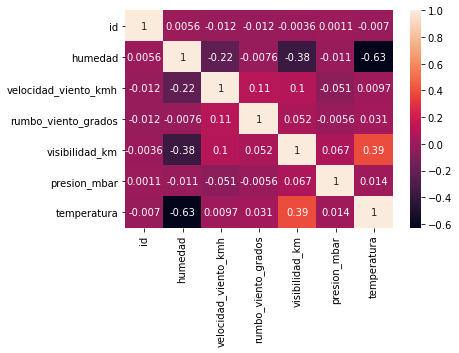

In [ ]:
sns.heatmap(data.corr(), annot=True)

##### Temperatura

En primer lugar observaremos la columna **temperatura** que es la que intentaremos predecir. Como observamos anteriormente es de tipo *float*, es decir un número decimal.

Vamos a observar el mímino, el máximo y el promedio y con ayuda de un gráfico [displot](https://seaborn.pydata.org/generated/seaborn.distplot.html) observaremos su distribución.


In [ ]:
data["temperatura"].min()

-21.82

In [ ]:
data["temperatura"].max()

38.84

In [ ]:
data["temperatura"].mean()

11.85719

<AxesSubplot:xlabel='temperatura'>

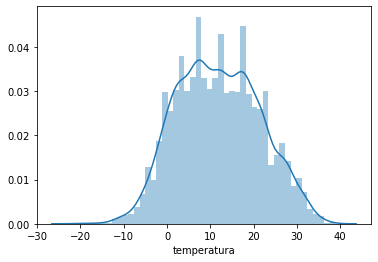

In [ ]:
sns.displot(data["temperatura"])

Podemos observar que la temperatura va desde -21.82ºC hasta 38.84ºC siendo el promedio 11.85ºC. La forma de distribución es *normal* que es lo más habitual.


##### id

Observaremos la columna "id" viendo los posibles registros que tiene con *value_counts()*. Podemos observar que el dato no se repite en ningún caso por lo que no tiene utilidad a la hora de realizar nuestro modelo. Debido a eso lo eliminaremos utilizando la función *drop*

In [ ]:
data["id"].value_counts()

2047    1
9518    1
7481    1
5432    1
9526    1
       ..
2716    1
8857    1
4759    1
6806    1
0       1
Name: id, Length: 10000, dtype: int64

In [ ]:
data.shape

(10000, 9)

In [ ]:
data.drop(columns="id", inplace=True)

In [ ]:
data.shape

(10000, 8)

#### Variables categóricas

##### Descripción

Ahora analizaremos la variable "Descripción" que ya hemos visto que es un tipo de dato "object", vamos a ver que valores toma, cuánta cantidad de cada uno y realizaremos un gráfico [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) para observarlo.

In [ ]:
data["descripcion"].unique()

array(['Cold', 'Warm', 'Normal', nan], dtype=object)

Se puede observar los 3 tipos de clima: "Frio, "Cálido" y "Normal" y *nan*. Este último se refiere a que hay datos nulos como veremos en profundidad el encuentro que viene

In [ ]:
data["descripcion"].value_counts()

Normal    4989
Warm      2506
Cold      2497
Name: descripcion, dtype: int64

<AxesSubplot:xlabel='descripcion', ylabel='count'>

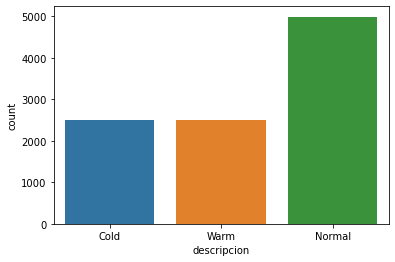

In [ ]:
sns.countplot(data["descripcion"])

##### Lluvia

Ahora analizaremos la variable "Lluvia" que el tipo de dato también es "object", vamos a realizar el mismo análisis que *descripcion*.

In [ ]:
data["lluvia"].unique()

array(['no', 'si', nan], dtype=object)

In [ ]:
data["lluvia"].value_counts()

si    8911
no    1088
Name: lluvia, dtype: int64

<AxesSubplot:xlabel='lluvia', ylabel='count'>

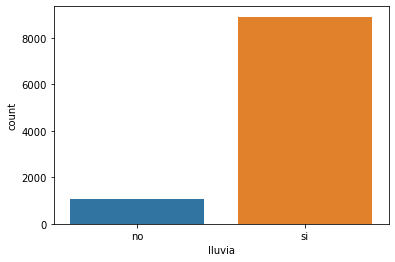

In [ ]:
sns.countplot(data["lluvia"])

In [ ]:
data.head(3)

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60


Dado que hemos realizado cambios en el Dataset y el encuentro que viene retomaremos este mismo, vamos a utilizar el método *to_csv* que es el opuesto a *read_csv* y sirve para exportar un CSV de una Notebook.

Se puede descargar en la computadora o guardarlo en el Drive:

In [ ]:
data.to_csv("/content/drive/MyDrive/Aprender Programando/2022/Guías y Recursos - Trayectos 2021/Recursos/Modulos 1 y 2. Presentación CABA/Ciencia de datos/2022/Módulo 2/Encuentro 2/data_clima.csv", index=False)



In [ ]:
# Descargar en computadora

from google.colab import files

data.to_csv("data_clima2.csv", index=False)
files.download("data_clima2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>